In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def read_band(filename):
    with rasterio.open(filename) as f:
        return f.read(1)

def calculate_ndsi(green_band, swir_band):
    ndsi = (green_band - swir_band) / (np.where((green_band + swir_band) == 0, np.finfo(float).eps, green_band + swir_band))
    
    ndsi[np.isnan(ndsi)] = -999
    ndsi[np.isinf(ndsi)] = -999
    return ndsi

def create_snow_mask(ndsi, threshold=0.3):
    snow_mask = ndsi > threshold
    return snow_mask

In [8]:
green_band_path = "C:/Users/HP/Downloads/LC09_L2SP_001073_20230712_20230714_02_T1_SR_B3.tif"
swir_band_path = "C:/Users/HP/Downloads/LC09_L2SP_001073_20230712_20230714_02_T1_SR_B6.tif"

green = read_band(green_band_path)
swir = read_band(swir_band_path)

ndsi = calculate_ndsi(green.astype(float), swir.astype(float))

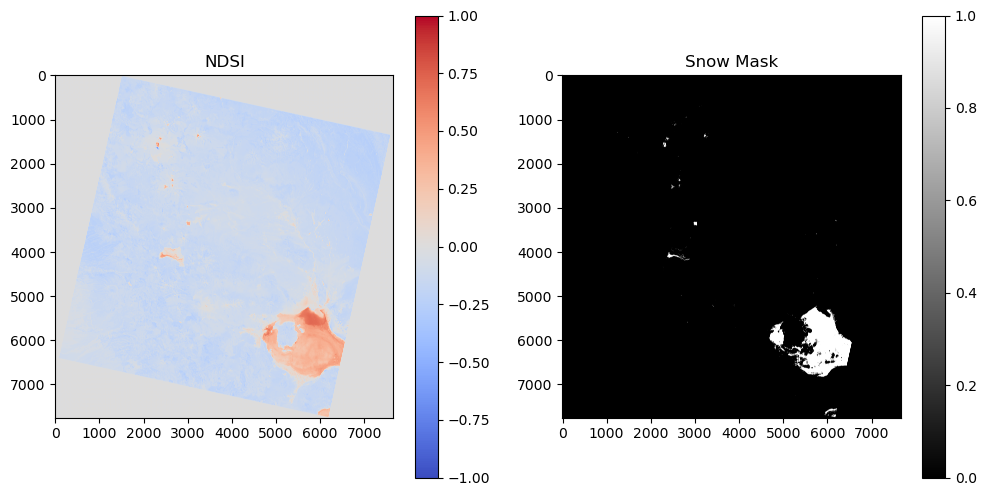

In [10]:
# Create snow mask
snow_mask = create_snow_mask(ndsi)

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('NDSI')
plt.imshow(ndsi, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Snow Mask')
plt.imshow(snow_mask, cmap='gray')
plt.colorbar()

plt.show()
